# 2D projection

In [1]:
import numpy as np
import sklearn
from nmf_with_missing_values import nmf_with_missing_values
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
%matplotlib inline

## load the data

In [6]:
#load_data
tmp = np.load('../data/imputed_data_kNN_neighbor_6_weights_distance.npz')
data = tmp['imputed']
selected = tmp['selected']
original_shape = data.shape

In [3]:
tmp = np.load('../data/mouse_brain_ISH_float32.npz')
data = tmp['data']
sections = tmp['sections']
original_shape = data.shape
d = data.shape[1] * data.shape[2] * data.shape[3]
data = np.reshape(data, (data.shape[0], d))

## calculate nmf (could be quite long, do not run this chunk if you have the intermediate result

In [7]:
X = data[:, (selected[0])] 
X = np.maximum(X, 0)

In [8]:
nmf = nmf_with_missing_values(n_outer_loops = 1, n_components = 18)
D = nmf.fit_transform(X)
A = nmf.components_

## save the intermediate result

In [5]:
np.savez('tmp_result.npz', D = D, A = A, X_guess = nmf.X_guess, data = data, original_shape = original_shape)

## load the intermediate result 

In [6]:
f = np.load('tmp_result.npz')
A = f['A']
original_shape = f['original_shape']
X_guess = f['X_guess']

In [4]:
f = np.load('../data/nmf_refit_result_ncomp_18_ratio_0.1.npz')
refit_coefs = f['coefs']
original_shape = f['original_shape']
X_guess = f['X_guess']
A = f['PPs']

(11, 55954)

### compute the distances between different patterns

In [11]:
D_cube = np.zeros((18,*data.shape[1:]))
D_cube[:,selected[0]] = A#.reshape([18] + list(original_shape[1:])) 

In [12]:
assert np.allclose(D_cube[0,:], A[0, :].reshape(original_shape[1:]))

ValueError: cannot reshape array of size 121469 into shape (67,41,58)

### arrange the patterns based on their weighted center

In [56]:
weightings = np.sum(D_cube, (2, 3))
index = np.argsort([np.argmax(weightings[x, :]) for x in range(14)])

### look at 2D projections of each pattern

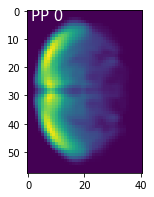

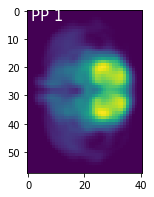

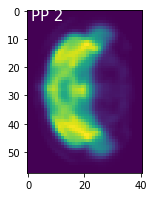

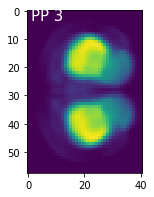

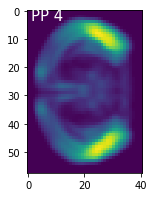

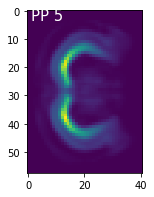

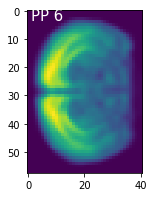

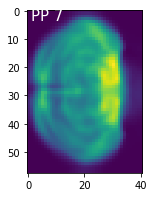

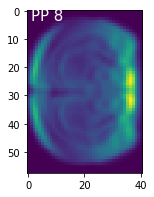

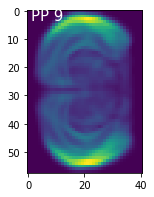

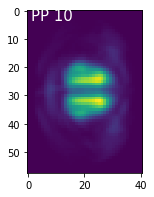

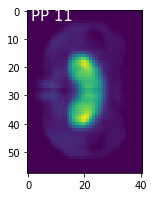

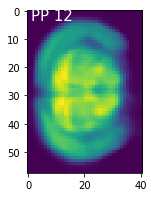

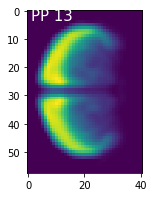

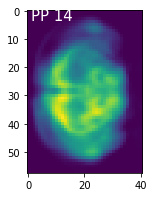

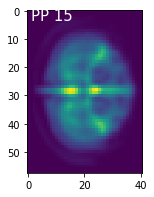

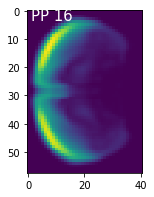

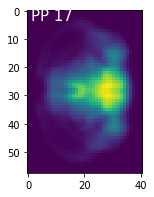

In [16]:
D_shrink = np.maximum(D_cube - 0, 0)
for i in range(18):
    _, a = plt.subplots(1, 1, figsize=(9, 3))
    a.imshow(np.mean(D_shrink[i, :, :, :], 0).T)
    a.text(1, 3, 'PP {}'.format(i), color='w', fontsize=15)

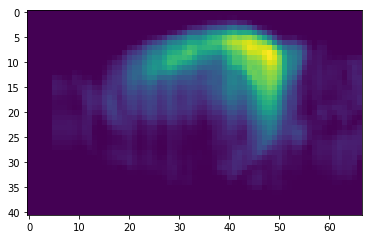

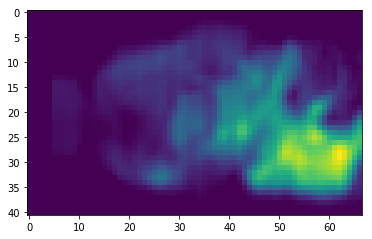

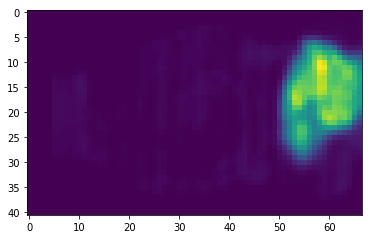

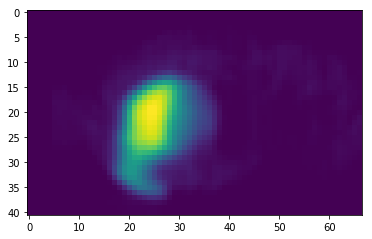

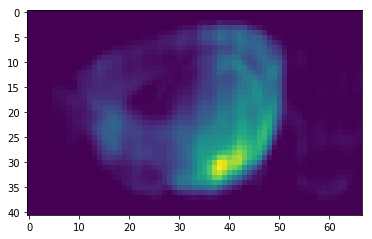

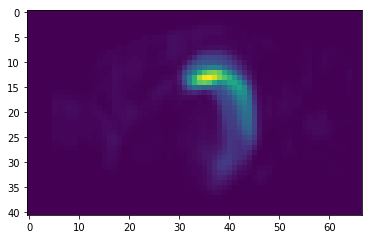

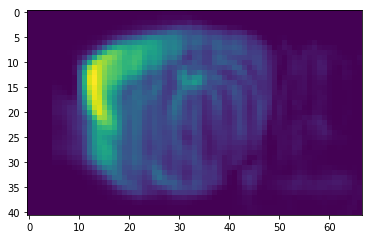

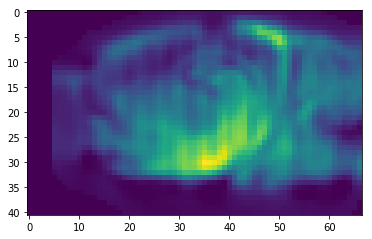

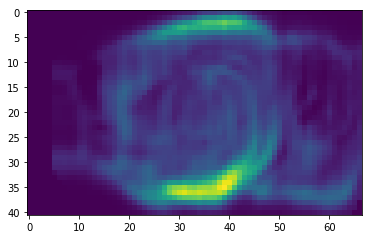

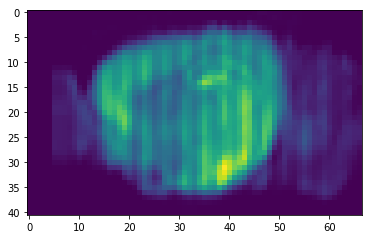

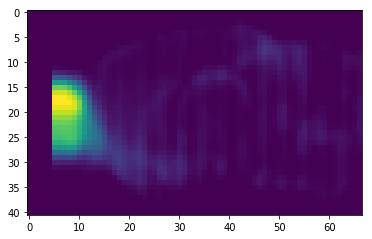

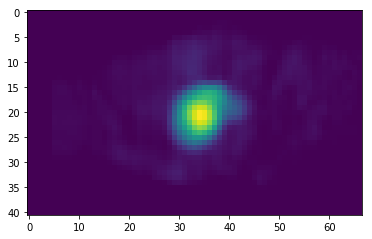

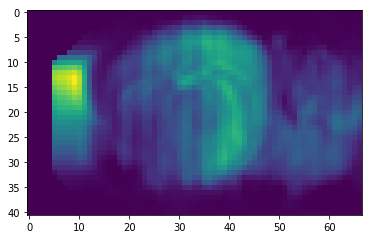

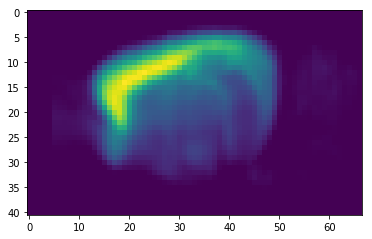

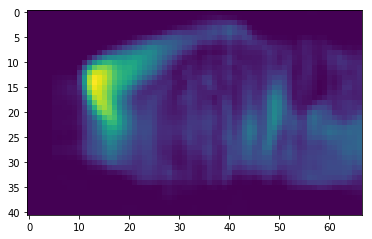

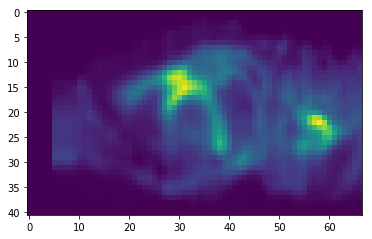

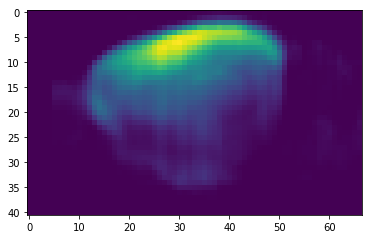

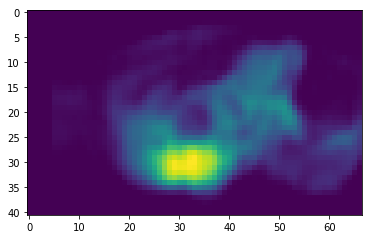

In [14]:
for i in range(18):
    plt.figure()
    plt.imshow(np.sum(D_cube[i, :, :, :], 2).T)

In [ ]:
### compute